# Pretrained Networks: Using VGG16 to make image predictions

### Step 1: Understand the architecture

![](vgg.png)

### Step 2: Read an image

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model
import matplotlib.pyplot as plt

### Read in the image and resize it

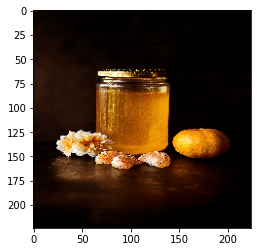

In [28]:
# Take an image from Unsplash
im = image.load_img('roberta-sorge-kp9UVn-PUac-unsplash.jpg', target_size=(224, 224))
plt.imshow(im)

**Q: Is this identical to the orginal image? Have we changed anything?**

* we've reshaped the image into a 224x224x3 tensor
* this may have downsides:
    * if the original image is 100000x100000 then resize becomes a bad idea
    * at this point a combination of cropping and resizing becomes sensible
    * Using a bounding box algorithm is a good idea
        * Chicken and egg - we need an image detection algorithm to detect the boxes, but we are trying a train an image detection algorithm 
* We could crop the image - we might lose more info depending on where we crop
* For sure cropping requires either a human or an alogirthm to tell us
* WE COULD TILE!! image we have a 2240 x 2240, we could tile into 10x10
    * the feature might overlap between tiles!!
    * this is applied when doing bounding boxes e.g facial recognition on a smartphone

### We have to do one more thing - shift the colours in a VGG-direction

In [29]:
a = image.img_to_array(im)
a = preprocess_input(a)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


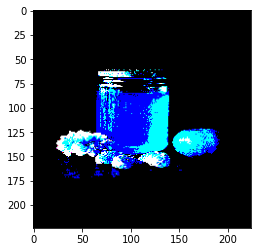

In [30]:
plt.imshow(a)

**Q: inspect the shape and data type of the numpy array and explain what you see**

* Maybe it makes the contrast more defined?
* Are the channels in a different order?
* I wonder if normalisation has anything to do with it?
    * We've done something like a min/max scaler

### Step 3: Load VGG16

In [31]:
# when you do transfer learnign you will drop the top
m = VGG16(weights='imagenet', include_top=True)

m.summary()
#looping through m.layers

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Q: What familiar elements do you see in the summary of the model?**

* Weve already done this!!

# Universal Approximation Theory - research if you're bored
* Neural networks can in theory approxiamte ANY other function

---

### Step 4: Prediction

In [16]:
import numpy as np

In [23]:
sorted([x[1].lower() for x in decode_predictions(p, 1000)[0]])

['abacus',
 'abaya',
 'academic_gown',
 'accordion',
 'acorn',
 'acorn_squash',
 'acoustic_guitar',
 'admiral',
 'affenpinscher',
 'afghan_hound',
 'african_chameleon',
 'african_crocodile',
 'african_elephant',
 'african_grey',
 'african_hunting_dog',
 'agama',
 'agaric',
 'aircraft_carrier',
 'airedale',
 'airliner',
 'airship',
 'albatross',
 'alligator_lizard',
 'alp',
 'altar',
 'ambulance',
 'american_alligator',
 'american_black_bear',
 'american_chameleon',
 'american_coot',
 'american_egret',
 'american_lobster',
 'american_staffordshire_terrier',
 'amphibian',
 'analog_clock',
 'anemone_fish',
 'angora',
 'ant',
 'apiary',
 'appenzeller',
 'apron',
 'arabian_camel',
 'arctic_fox',
 'armadillo',
 'artichoke',
 'ashcan',
 'assault_rifle',
 'australian_terrier',
 'axolotl',
 'baboon',
 'backpack',
 'badger',
 'bagel',
 'bakery',
 'balance_beam',
 'bald_eagle',
 'balloon',
 'ballplayer',
 'ballpoint',
 'banana',
 'band_aid',
 'banded_gecko',
 'banjo',
 'bannister',
 'barbell',
 '

In [18]:
np.array(([x[2] for x in decode_predictions(p, 1000)[0]])).sum()

1.0000001

In [32]:
from pprint import pprint

a = a.reshape(1, 224, 224, 3)
p = m.predict(a)
pprint(decode_predictions(p, 10)) # this gives us the category and our surety of prediction

[[('n02948072', 'candle', 0.51860726),
  ('n03937543', 'pill_bottle', 0.36696252),
  ('n02823750', 'beer_glass', 0.03896133),
  ('n02815834', 'beaker', 0.012802314),
  ('n07932039', 'eggnog', 0.012699428),
  ('n03916031', 'perfume', 0.008456569),
  ('n04131690', 'saltshaker', 0.005584858),
  ('n07930864', 'cup', 0.004070653),
  ('n12144580', 'corn', 0.0027165106),
  ('n03443371', 'goblet', 0.0026728422)]]


**Q: Why do we have to reshape?**

* We have to reshape it because we normally do predictions on collections of items
* In this we only have one item and keras is expecting alist
* So we make a 'list' of one picture

---

# BONUS

### Step 5: Intermediate output
We can visualize the intermediate output of any of the CNN layers, too!

* Check out the image in 9.5 
* Or, take a look at the hidden layers of an [MNIST CNN](https://www.cs.ryerson.ca/~aharley/vis/conv/)
* Finally, this [video](https://www.youtube.com/watch?v=AgkfIQ4IGaM) is another good resource
* The below code is useful for our problem space

In [34]:
len(m.layers)

23

In [36]:
cnn2.shape, cnn15.shape

((1, 224, 224, 64), (1, 14, 14, 512))

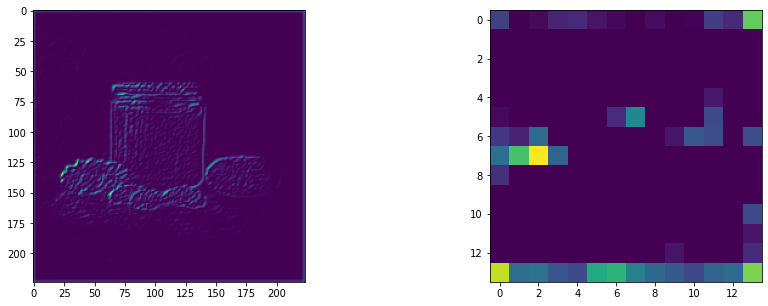

In [35]:
intermediate_layer_model = Model(inputs=m.input,
                                 outputs=[
                                     m.get_layer(index=2).output,
                                     m.get_layer(index=15).output
                                 ])

cnn2, cnn15 = intermediate_layer_model.predict(a)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cnn2[0,:, :, 0])
plt.subplot(1, 2, 2)
plt.imshow(cnn15[0,:, :, 3])

### Step 5: Different sized images

* Make a prediction for your own image.
* Use `image.load_img.resize()` to resize 
* Q: Will this work on all image sizes and shapes?

* we've reshaped the image into a 224x224x3 tensor
* this may have downsides:
    * if the original image is 100000x100000 then resize becomes a bad idea
    * at this point a combination of cropping and resizing becomes sensible
    * Using a bounding box algorithm is a good idea
        * Chicken and egg - we need an image detection algorithm to detect the boxes, but we are trying a train an image detection algorithm 
* We could crop the image - we might lose more info depending on where we crop
* For sure cropping requires either a human or an alogirthm to tell us
* WE COULD TILE!! image we have a 2240 x 2240, we could tile into 10x10
    * the feature might overlap between tiles!!
    * this is applied when doing bounding boxes e.g facial recognition on a smartphone

---